# Compute Architecure - Assessment
**Course**: TU 2025 25-26: 8645 -- COMPUTER INFRASTRUCTURE  
**Lecturer**: Ian McLauglin  
**Author**: Clyde Watts  








### Imports

yfinance - financial ticker data from yahoo  - [yfinance](https://github.com/ranaroussi/yfinance)
datetime - pythons inbuild date time
logging - python logging
os - operating system functions
glob - file selector

In [41]:
import yfinance
import logging
from datetime import datetime, timedelta
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Initialisation

In [10]:
# init logging
logging.basicConfig(level=logging.INFO)

## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

Problem 1: Requirements

##Extract##

1. Extract from yfinance data the stock data for META,AAPL,AMZN,NFLX,GOOG
2. For 5 complete previous days , that is TODAY - 6 days to TODAY -1 day , exclude TODAY because it is not complete
3. File format will YYYYMMDD-HHmmss.csv where YYYY - is 4 digit year , MM month 01-12 , DD - is 01-31. HH - hours , 24 our clock , mm - minutes 00-59 , seconds 00-59.
4. Grain - Hour

Column
Date , <ticket> ( Open,High,Low,Close,Volume) ....
ticket is META , AAPL , AMZN , NFLX or GOOG
Open - open price
Close - close price
High - High pricr
Low - Low price
Volumn - Volume in period 
 

Question - What about Daylight saving time - over and under hour every size months

In [11]:
# prototype for extracting stock data
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
def get_data(tickers = tickers,start_date=None, end_date=None,interval="1h",data_path="./data/"):
    """Function to get stock data from yfinance"""
    if start_date is None:
        start_date = (datetime.now() - timedelta(days=6)).strftime("%Y-%m-%d")
        # create file name based on current date and time
        file_name = f"{data_path}{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    else:
        # convert start_date to datetime object
        start_date_time = datetime.strptime(start_date, "%Y-%m-%d")
        # create file name based on start time and 23:59:59 of end date
        start_date_str = start_date_time.strftime("%Y%m%d") + "_235959"
        file_name = f"{data_path}{start_date_str}.csv"
    if end_date is None:
        end_date = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
    # check if directory exists
    if not os.path.exists(data_path):
        logging.info(f"Creating directory: {data_path}")
        os.makedirs(data_path)
    # if file exists then delete it
    if os.path.exists(file_name):
        logging.info(f"Deleting existing file: {file_name}")
        os.remove(file_name)
    logging.info(f"Start Date: {start_date}, End Date: {end_date}")
    df_data = yfinance.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
    # Save the data to a CSV file
    df_data.to_csv(file_name)
    return df_data
   



In [12]:
df = get_data(tickers=tickers)

INFO:root:Start Date: 2025-09-24, End Date: 2025-09-29
C:\Users\cw171001\AppData\Local\Temp\ipykernel_17928\357208236.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yfinance.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

Requirements

1. Glob the data folder for YYYYMMDD_hhmmss.csv files. 
    1. We will glob the files looking for the pattern 20*.*csv
    1.

References

https://docs.python.org/3/library/glob.html


In [45]:
file_list = glob.glob('./data/20[0-9][0-9][0-1][0-9][0-3][0-9]_[0-9][0-9][0-9][0-9][0-9][0-9].csv')
# find the max file based on the date in the filename
file_list.sort()
# check if the file list is not empty
if not file_list:
    raise FileNotFoundError("No data files found in the data directory.")
latest_file = file_list[-1]
# load the lastest file into pandas dataframe
df_latest = pd.read_csv(latest_file, header=[0,1], index_col=0, parse_dates=True)
print(df_latest.info())
print(df_latest.columns.levels[0])
print(df_latest.columns.levels[1])
print(df_latest.index)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2025-09-24 13:30:00+00:00 to 2025-09-26 19:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (AAPL, Open)    21 non-null     float64
 1   (AAPL, High)    21 non-null     float64
 2   (AAPL, Low)     21 non-null     float64
 3   (AAPL, Close)   21 non-null     float64
 4   (AAPL, Volume)  21 non-null     int64  
 5   (GOOG, Open)    21 non-null     float64
 6   (GOOG, High)    21 non-null     float64
 7   (GOOG, Low)     21 non-null     float64
 8   (GOOG, Close)   21 non-null     float64
 9   (GOOG, Volume)  21 non-null     int64  
 10  (NFLX, Open)    21 non-null     float64
 11  (NFLX, High)    21 non-null     float64
 12  (NFLX, Low)     21 non-null     float64
 13  (NFLX, Close)   21 non-null     float64
 14  (NFLX, Volume)  21 non-null     int64  
 15  (AMZN, Open)    21 non-null     float64
 16  (AMZN, High)    21 non-null     

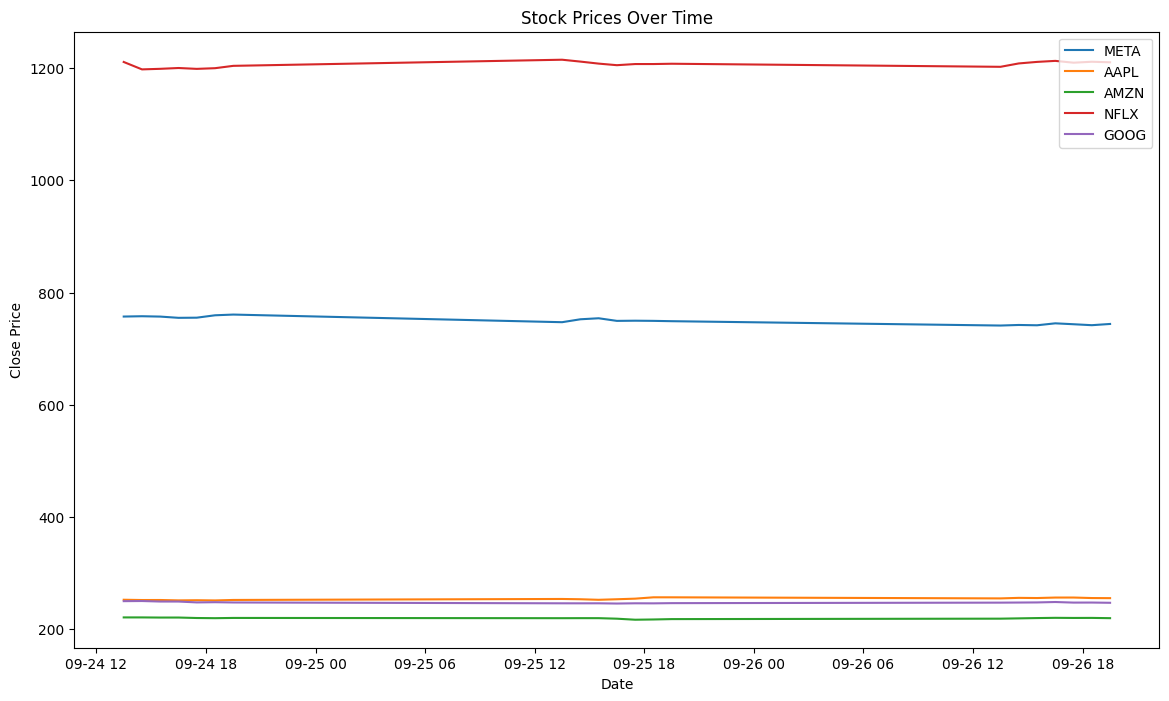

In [43]:

plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(df_latest.index, df_latest[(ticker, 'Close')], label=ticker)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()
#plt.savefig(f"./plots/{datetime.now().strftime('%Y%m%d-%H%M%S')}.png")